In [ ]:
!pip install tensorflow==2.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 43.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  At

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
print(tf.__version__)

2.10.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Directories (Adjust accordingly)
train_dir = '/content/drive/MyDrive/Dataset Rempah/train'
test_dir = '/content/drive/MyDrive/Dataset Rempah/test'
val_dir = '/content/drive/MyDrive/Dataset Rempah/val'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valtest_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = valtest_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = valtest_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1280 images belonging to 4 classes.
Found 160 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Membekukan base model agar tidak ikut dilatih

model = Sequential([
    base_model,  # Menambahkan base model
    GlobalAveragePooling2D(),  # Lapisan pooling global
    Dense(128, activation='relu'),  # Lapisan dense dengan 128 neuron dan aktivasi ReLU
    Dropout(0.5),  # Dropout untuk mengurangi overfitting
    Dense(4, activation='softmax')  # Output layer dengan aktivasi softmax
])

# Menampilkan ringkasan model
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                           

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[lr_scheduler, early_stopping]
)

Epoch 1/20
40/40 [==============================] - 723s 18s/step - loss: 0.7538 - accuracy: 0.7117 - val_loss: 0.5289 - val_accuracy: 0.8687 - lr: 0.0010
Epoch 2/20
40/40 [==============================] - 407s 10s/step - loss: 0.3205 - accuracy: 0.8898 - val_loss: 0.5162 - val_accuracy: 0.8250 - lr: 0.0010
Epoch 3/20
40/40 [==============================] - 410s 10s/step - loss: 0.2259 - accuracy: 0.9227 - val_loss: 0.3896 - val_accuracy: 0.8813 - lr: 0.0010
Epoch 4/20
40/40 [==============================] - 380s 9s/step - loss: 0.1866 - accuracy: 0.9359 - val_loss: 0.3700 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 5/20
40/40 [==============================] - 410s 10s/step - loss: 0.1664 - accuracy: 0.9398 - val_loss: 0.3439 - val_accuracy: 0.8875 - lr: 0.0010
Epoch 6/20
40/40 [==============================] - 417s 10s/step - loss: 0.1208 - accuracy: 0.9617 - val_loss: 0.4556 - val_accuracy: 0.8625 - lr: 0.0010
Epoch 7/20
40/40 [==============================] - 402s 10s/step - los

In [ ]:
# Save the model
model.save('rempah.h5')

In [ ]:
# Load the saved model
from tensorflow.keras.models import load_model

loaded_model = load_model("rempah.h5")

In [ ]:
test_generator = valtest_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 160 images belonging to 4 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

5/5 [==============================] - 93s 20s/step - loss: 0.2855 - accuracy: 0.8938
Test Accuracy: 89.38%
Test Loss: 0.2855


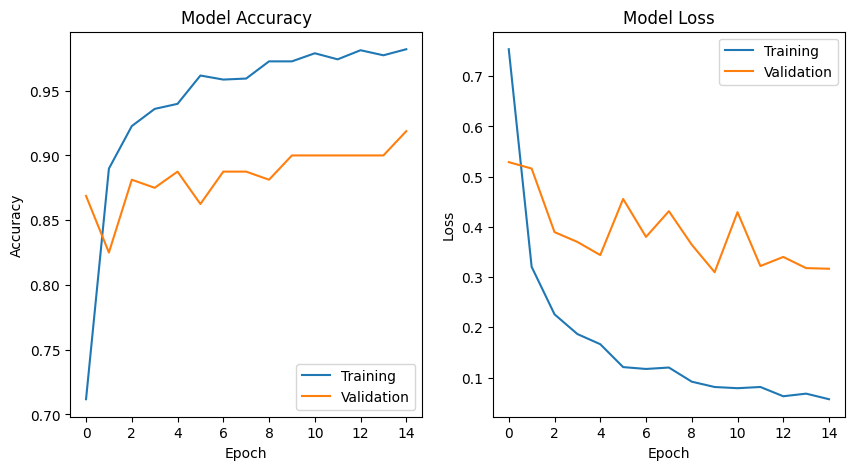

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])

print('\n\n')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

plt.show()

5/5 [==============================] - 56s 10s/step


<Figure size 1000x1000 with 0 Axes>

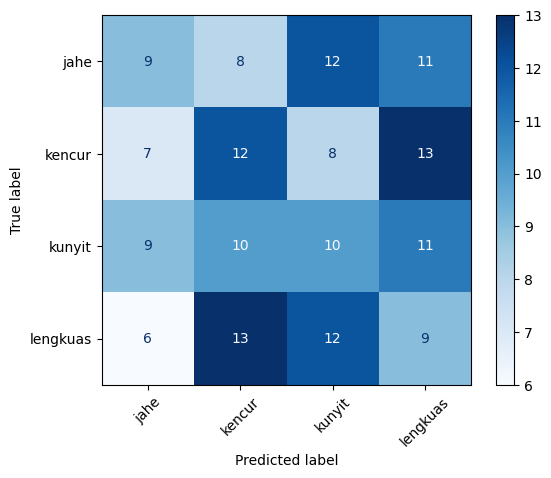

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

#Confusion Matrix
# Get true labels and predictions
test_labels = test_generator.classes
test_labels = test_labels[:len(test_generator.filenames)]  # Ensure the length matches

# Predict the labels for the test data
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 10))
cmd.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()

Saving 146.jpg to 146.jpg
1/1 [==============================] - 2s 2s/step
Prediksi: Jahe (Confidence: 1.00)


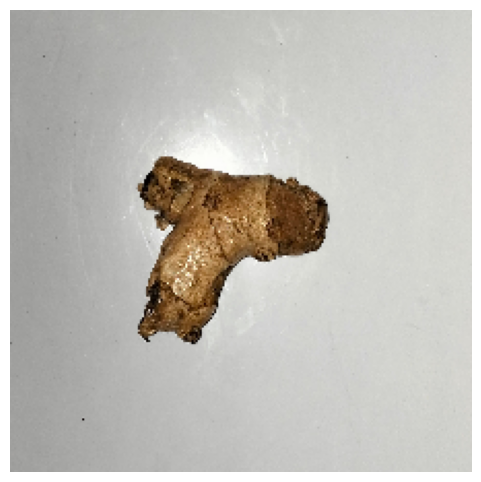

In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
from tensorflow.keras.models import load_model

# Daftar nama kelas sesuai urutan yang digunakan saat pelatihan model
class_names = ["Jahe", "Kencur", "Kunyit", "Lengkuas"]

# Function to predict and display a single image uploaded via browser
def predict_uploaded_image(model):
    # Upload image file
    uploaded = files.upload()

    for img_name in uploaded.keys():
        # Load and preprocess the uploaded image
        img_path = img_name
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale to [0, 1]

        # Predict the class probabilities
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions[0])

        # Check confidence level
        confidence = predictions[0][predicted_class_index]

        if confidence < 0.5:
            print("Tidak termasuk dalam kategori yang dikenali.")
        else:
            predicted_class_name = class_names[predicted_class_index]
            print(f'Prediksi: {predicted_class_name} (Confidence: {confidence:.2f})')

        # Prepare plot
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis('off')

# Load your trained model
model = load_model('rempah.h5')  # Path to your trained model

# Predict an uploaded image
predict_uploaded_image(model)
